# Visualizations And Data cleaning

In [14]:
import sys
sys.path.append("/Users/mikelgallo/repos/master_repo") # main path to repo



Let's explore the Boston housing dataset.

### Content

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI Machine Learning Repository1):

| No.  | Variable  | Description                                                         |
|------|-----------|---------------------------------------------------------------------|
| 1    | CRIM      | Per capita crime rate by town                                       |
| 2    | ZN        | Proportion of residential land zoned for lots over 25,000 sq.ft.   |
| 3    | INDUS     | Proportion of non-retail business acres per town                   |
| 4    | CHAS      | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| 5    | NOX       | Nitric oxides concentration (parts per 10 million)                  |
| 6    | RM        | Average number of rooms per dwelling                                |
| 7    | AGE       | Proportion of owner-occupied units built prior to 1940             |
| 8    | DIS       | Weighted distances to five Boston employment centers               |
| 9    | RAD       | Index of accessibility to radial highways                           |
| 10   | TAX       | Full-value property-tax rate per $10,000                           |
| 11   | PTRATIO   | Pupil-teacher ratio by town                                         |
| 12   | B         | 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town       |
| 13   | LSTAT     | % lower status of the population                                   |
| 14   | MEDV      | Median value of owner-occupied homes in $1000s                      |






In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import os

## Own modules
#import Analysis.function_file as hh
#from Analysis.function_file import *

In [3]:
os.getcwd()

'/Users/mikelgallo/repos/master_repo/Python_practice'

In [6]:

house_path='/Users/mikelgallo/repos/master_repo/python_brushup/datasets/housing.csv'

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(house_path, header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Now let's explore the dataset. I want to see relationships between distance to the center and crime. What would be the best way to visually analyze this in your opinion?

## Exercise

Let's explore now how is the black population distributed spcially. Plot the same graph including distance to the centre and the proportion of blacks per town.

IMPORTANT! Notice I want the proportion of blacks.

In [ ]:
Bk = df['B']/1000

<AxesSubplot:xlabel='DIS', ylabel='B'>

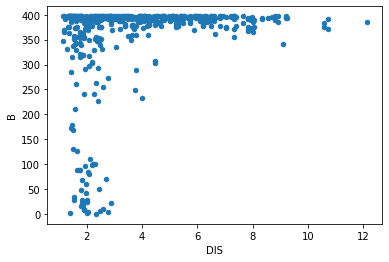

In [11]:
df.plot(x = 'DIS',y= 'B', kind = 'scatter')

plt.xlabel

## Outliers

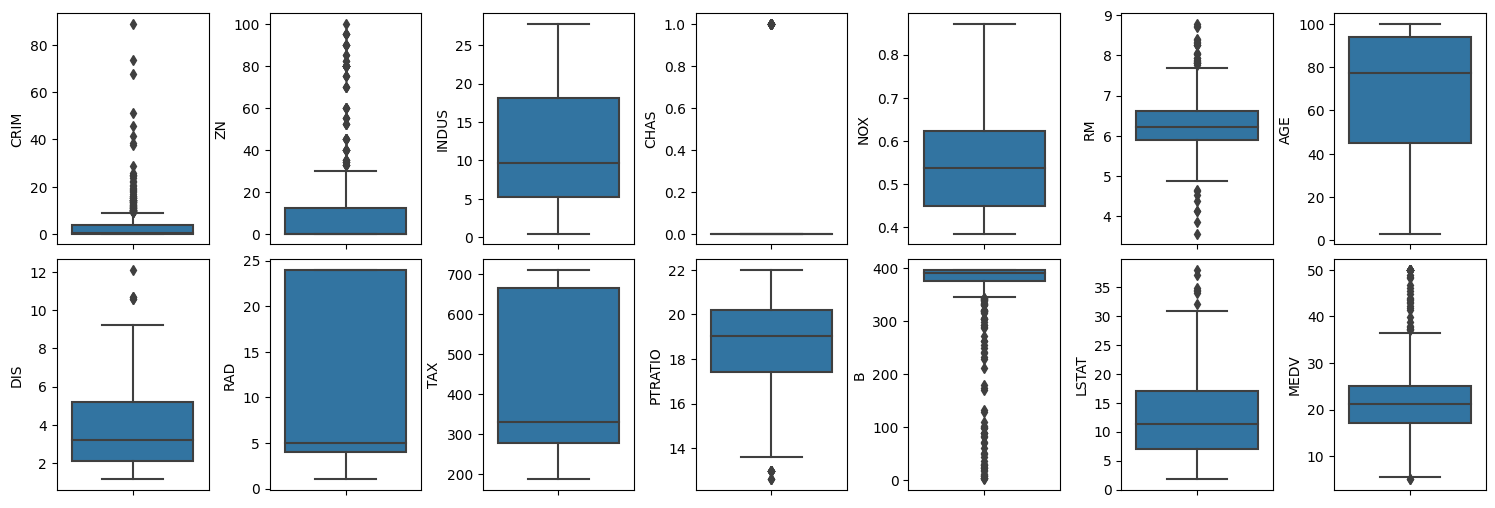

In [ ]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 5)) #initialize grid
ax = ax.flatten() #numpy method, makes it easier to iterate. Oth you would need a double loop.
index = 0

col_interest=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
'PTRATIO', 'B', 'LSTAT', 'MEDV']

for i in col_interest:
  sns.boxplot(y=i, data=df, ax=ax[index]) #seaborn is just another plotting module
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

## Interpretation of boxplots:

<img src="./images/boxplot.png" alt="Getting Started" width="300">


### Outliers:

We can already see which variables might contain outliers. Now, let's compute how problematic this is for each of them


In [ ]:
# this code just displays what the box plots showed above.

for i in col_interest:
    df.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = np.nanpercentile(df[i], [25,75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr) #min and max (whiskers) in the figure above.
    upper_bound = q3+(1.5*iqr)
    outlier_data = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)] #creating a series of outlier data
    perc = (outlier_data.count()/df[i].count())*100
    print(f'Outliers in {i} is {perc} with count {outlier_data.count()}')
    #----------------------code below is for comming sections----------------------
    if i == 'B':
        outlierDataB_index = outlier_data.index
        outlierDataB_LB = df[i][(df[i] < lower_bound)]
        outlierDataB_UB = df[i][(df[i] > upper_bound)]
    elif i == 'CRIM':
        outlierDataCRIM_index = outlier_data.index
        outlierDataCRIM_LB = df[i][(df[i] < lower_bound)]
        outlierDataCRIM_UB = df[i][(df[i] > upper_bound)]
    elif i == 'MEDV':
        lowerBoundMEDV = lower_bound
        upperBoundMEDV = upper_bound

Outliers in CRIM is 13.04% with count 66
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in CHAS is 6.92% with count 35
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


## Handy tricks for pandas

## Exercise:
Suppose I want create a new column from CHAS that contains a string:

'limits' if 1
'not limits' if 0

Investigaate the use of map() in order to do it.



In [19]:
df['NEW'] = df['CHAS']

In [21]:
def limit(n):
    if n ==1:
        return 'limits'
    else:
        return 'no limits'

In [24]:
# MAP useful functions
df['NEW'] = df['CHAS'].map(lambda x :limit(x))
                        

In [ ]:
df['new2']

In [27]:
df[df['CHAS'] == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NEW
142,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4,limits
152,1.12658,0.0,19.58,1,0.8710,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,15.3,limits
154,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,17.0,limits
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02,15.6,limits
160,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50,27.0,limits
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0,limits
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0,limits
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277.0,18.6,381.32,14.66,24.4,limits
209,0.43571,0.0,10.59,1,0.4890,5.344,100.0,3.8750,4,277.0,18.6,396.90,23.09,20.0,limits
210,0.17446,0.0,10.59,1,0.4890,5.960,92.1,3.8771,4,277.0,18.6,393.25,17.27,21.7,limits


## EXERCISE:


Now let's transfrom ZN. In stead of over 25000 acrees I would like to have a new column , ZN2, that computes the masure over 1000 acress.

Use the apply() method.

### Exercise:

Given the df below, my goal is to transform the column "category" into an index. Complete the code below.


In [ ]:
import pandas as pd
df=pd.DataFrame({'category':['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']})


label_dict={}


for i, j in XXX:
    label_dict[j]=i



df['label']=XXX
df.label
## Expected output


0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
Name: label, dtype: int64

## Dummies:

Sometimes you might need to create dummies in a one hot encoding fashion (essential for training models). There is an easy method to achieve this.

In [ ]:
pd.get_dummies(df['category'], prefix='label')

,label_a,label_b,label_c,label_d,label_e,label_f,label_g,label_h,label_i,label_j,label_k,label_l,label_m,label_n,label_o
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Merging:

### 1. Inner Join:
An inner join returns only the rows that have matching values in both DataFrames. It's the default behavior of pd.merge.


In [ ]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value1': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value2': ['foo', 'bar', 'baz', 'qux']})

# Merge using inner join
result_inner = pd.merge(df1, df2, on='key', how='inner')

print(result_inner)


  key  value1 value2
0   B       2    foo
1   D       4    bar


### 2. Left Join:
A left join returns all rows from the left DataFrame and the matching rows from the right DataFrame. If there are no matches in the right DataFrame, it fills in with NaN values.

In [ ]:
# Merge using left join
result_left = pd.merge(df1, df2, on='key', how='left')

print(result_left)


  key  value1 value2
0   A       1    NaN
1   B       2    foo
2   C       3    NaN
3   D       4    bar


### 3. Right Join:

A right join returns all rows from the right DataFrame and the matching rows from the left DataFrame. If there are no matches in the left DataFrame, it fills in with NaN values.



In [ ]:
# Merge using right join
result_right = pd.merge(df1, df2, on='key', how='right')

print(result_right)


  key  value1 value2
0   B     2.0    foo
1   D     4.0    bar
2   E     NaN    baz
3   F     NaN    qux


### 4. Outer Join:

An outer join returns all rows from both DataFrames and fills in with NaN values where there are no matches.

In [ ]:
# Merge using outer join
result_outer = pd.merge(df1, df2, on='key', how='outer')

print(result_outer)


  key  value1 value2
0   A     1.0    NaN
1   B     2.0    foo
2   C     3.0    NaN
3   D     4.0    bar
4   E     NaN    baz
5   F     NaN    qux


## More handy uses of merge:

### Merging on multiple columns:

You can merge DataFrames on multiple columns by passing a list of column names to the on parameter. This is useful when you need to match rows based on multiple criteria.


In [ ]:
import pandas as pd
# lets create to keys

df1 = pd.DataFrame({'key1': ['A', 'B', 'C', 'D'],
         'key2': [1, 2, 3, 4],
         'value1': [10, 20, 30, 40]})


# Create DataFrame df2
df2 = pd.DataFrame({'key1': ['B', 'C', 'E', 'F'],
         'key2': [2, 3, 5, 6],
         'value2': [50, 60, 70, 80]})


result = pd.merge(df1, df2, on=['key1', 'key2'])
result

,key1,key2,value1,value2
0,B,2,20,50
1,C,3,30,60


### Using Different Column Names in Left and Right DataFrames:

If the columns you want to merge on have different names in the left and right DataFrames, you can use the left_on and right_on parameters.

In [ ]:
result = pd.merge(df1, df2, left_on='left_column', right_on='right_column')


### Merging on Index:

You can merge DataFrames on their indices instead of columns by using the left_index and right_index parameters.



In [ ]:
result = pd.merge(df1, df2, left_index=True, right_index=True)


### Specifying Suffixes for Duplicate Column Names:
When merging DataFrames with duplicate column names, you can specify suffixes to be added to the duplicate columns in the resulting DataFrame.

In [ ]:
result = pd.merge(df1, df2, on='key', suffixes=('_left', '_right'))


## Using groupby()

groupby() methos agregates and allows you to derive plots, decreiptive statistics etc.  by your pre-defined groups.

Let's see it with an exercise.


## EXERCISE:



- Load pandas_class_data.csv
- Use groupby() in order to show the average grade on the different brush up courses. Who grades better Manu or I?
- How do averages look by 5 years age cohorts?





## HINT:



In [ ]:
df=pd.XXX('')

# df.groupby('Type_brushup').mean()

age_cohort={}

for i in range(df.age.min(),df.age.max(),5):
    print(i)
    cohort_name=f'{i}-{i+4}'
    age_cohort[cohort_name]=list(range(i,i+5))





def cohort_map(a:int)->str:
    """This fucntion checks whether an age is in a cohort and returns the cohort string

    Args:
        a (int): age

    Returns:
        str: string of the cohort
    """
    for key, val in age_cohort.items():
        if a in XXX:
            return key

